In [66]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
import pandas as pd
import csv
import os


In [67]:
# read csv for death rates

death_url = "https://data.cdc.gov/api/views/bi63-dtpu/rows.csv?accessType=DOWNLOAD"

death_df = pd.read_csv(death_url, encoding="utf-8")

death_df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


In [68]:
# delete the "113 cause name" "State" "Age-adjusted Death Rate" columns

#del death_df['113 Cause Name']


del death_df['113 Cause Name']
death_df.head()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,Unintentional injuries,United States,169936,49.4
1,2017,Unintentional injuries,Alabama,2703,53.8
2,2017,Unintentional injuries,Alaska,436,63.7
3,2017,Unintentional injuries,Arizona,4184,56.2
4,2017,Unintentional injuries,Arkansas,1625,51.8


In [69]:
# make the data frame show only totals in the United States (not individual states)

death_group = death_df.loc[death_df['State']=='United States']

death_group['Cause Name'].unique()

array(['Unintentional injuries', 'All causes', "Alzheimer's disease",
       'Stroke', 'CLRD', 'Diabetes', 'Heart disease',
       'Influenza and pneumonia', 'Suicide', 'Cancer', 'Kidney disease'],
      dtype=object)

In [5]:
# creating a df for each individual disease

unintentional_injuries = death_group.loc[death_group['Cause Name']=='Unintentional injuries']
alz = death_group.loc[death_group['Cause Name']=="Alzheimer's disease"]
stroke = death_group.loc[death_group['Cause Name']=='Stroke']
clrd = death_group.loc[death_group['Cause Name']=='CLRD']
diabetes = death_group.loc[death_group['Cause Name']=='Diabetes']
heart_disease = death_group.loc[death_group['Cause Name']=='Heart disease']
flu = death_group.loc[death_group['Cause Name']=='Influenza and pneumonia']
suicide = death_group.loc[death_group['Cause Name']=='Suicide']
cancer = death_group.loc[death_group['Cause Name']=='Cancer']
kidney = death_group.loc[death_group['Cause Name']=='Kidney disease']

unintentional_injuries

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,Unintentional injuries,United States,169936,49.4
623,2016,Unintentional injuries,United States,161374,47.4
1188,2015,Unintentional injuries,United States,146571,43.2
1760,2014,Unintentional injuries,United States,135928,40.5
2332,2013,Unintentional injuries,United States,130557,39.4
2904,2012,Unintentional injuries,United States,127792,39.1
3476,2011,Unintentional injuries,United States,126438,39.1
4048,2010,Unintentional injuries,United States,120859,38.0
4620,2009,Unintentional injuries,United States,118021,37.5
5192,2008,Unintentional injuries,United States,121902,39.3


<IPython.core.display.Javascript object>


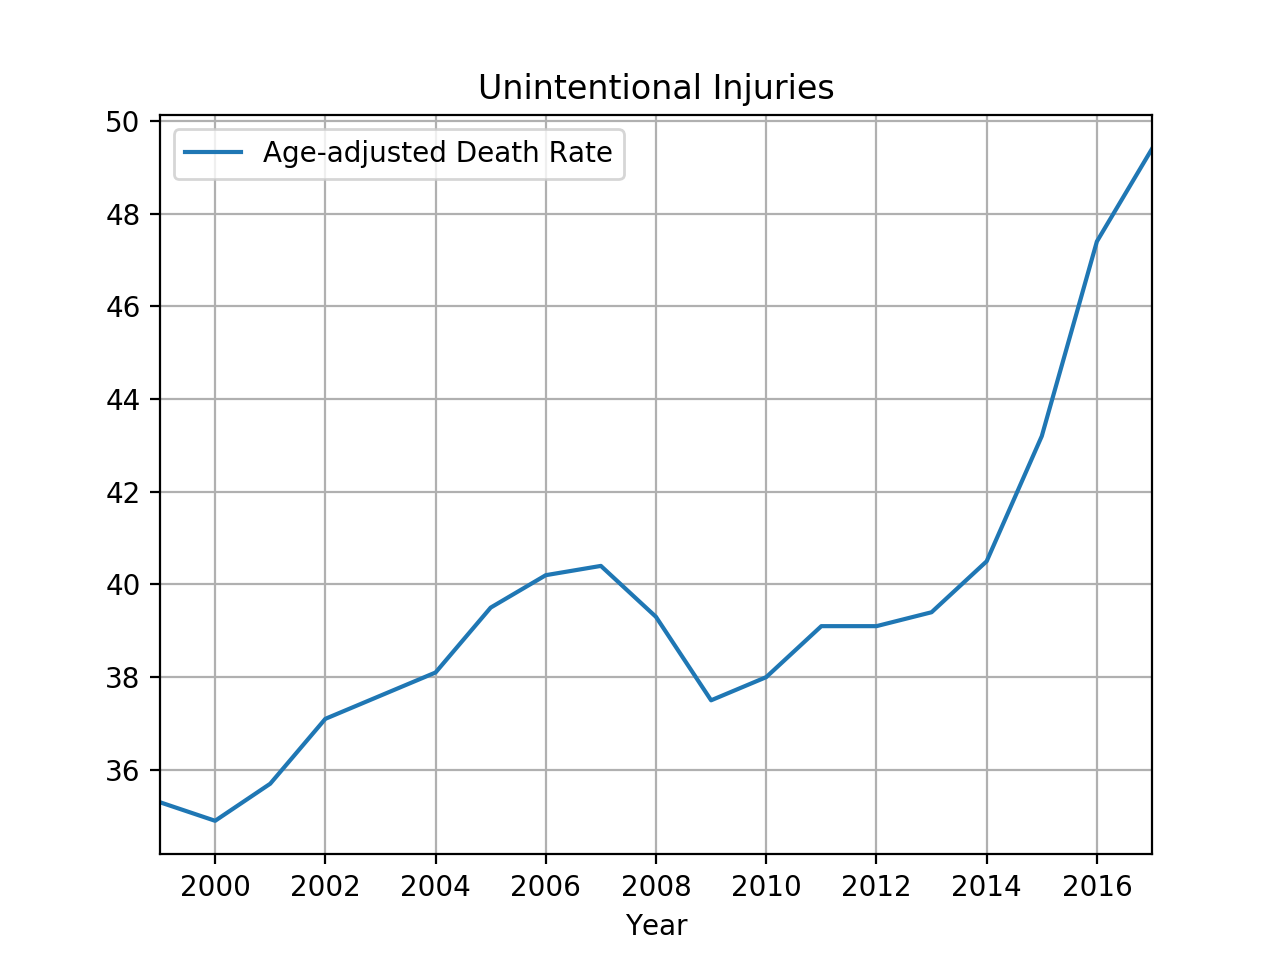

<IPython.core.display.Javascript object>


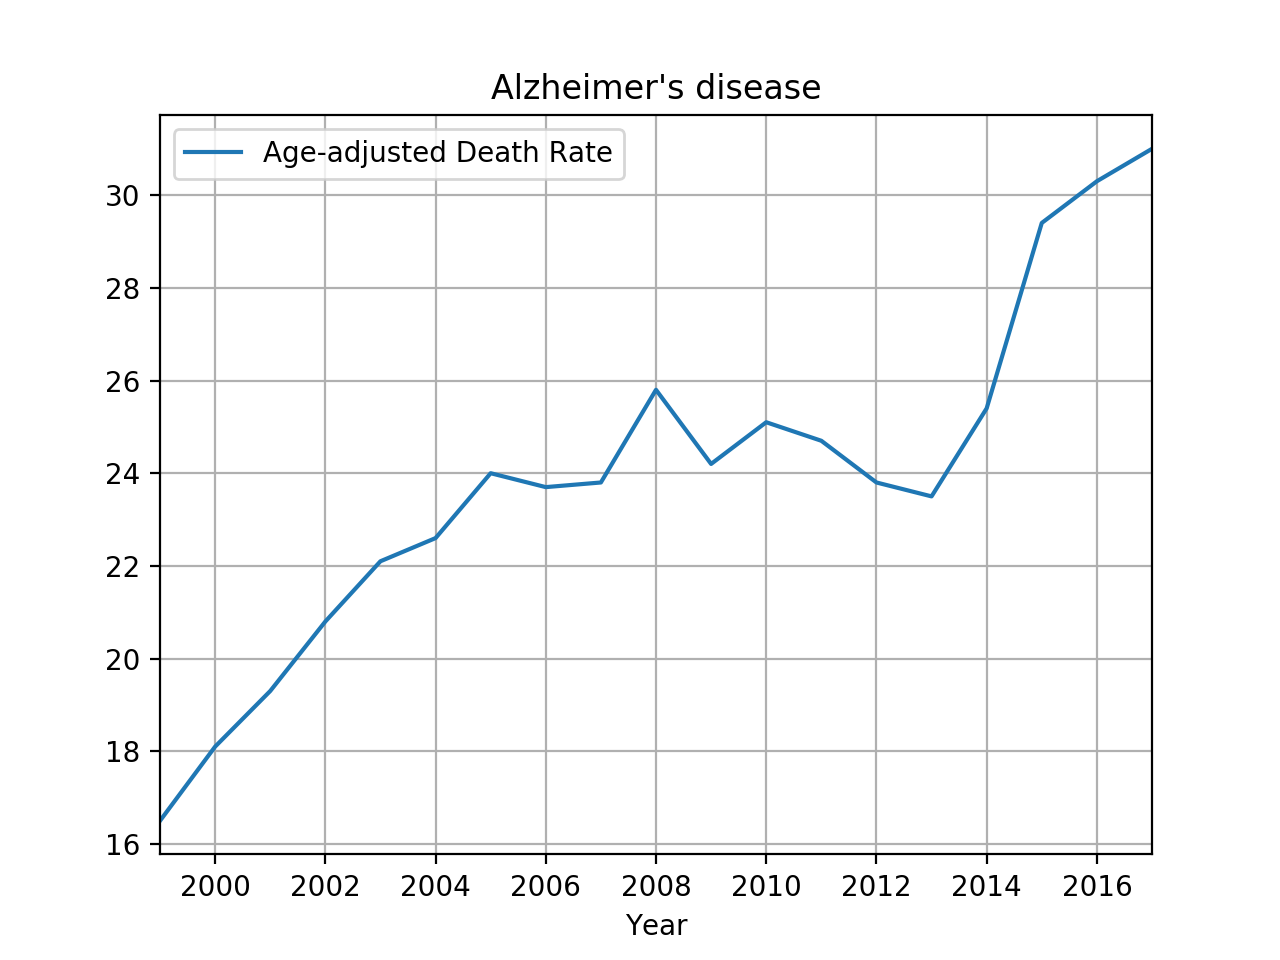

<IPython.core.display.Javascript object>


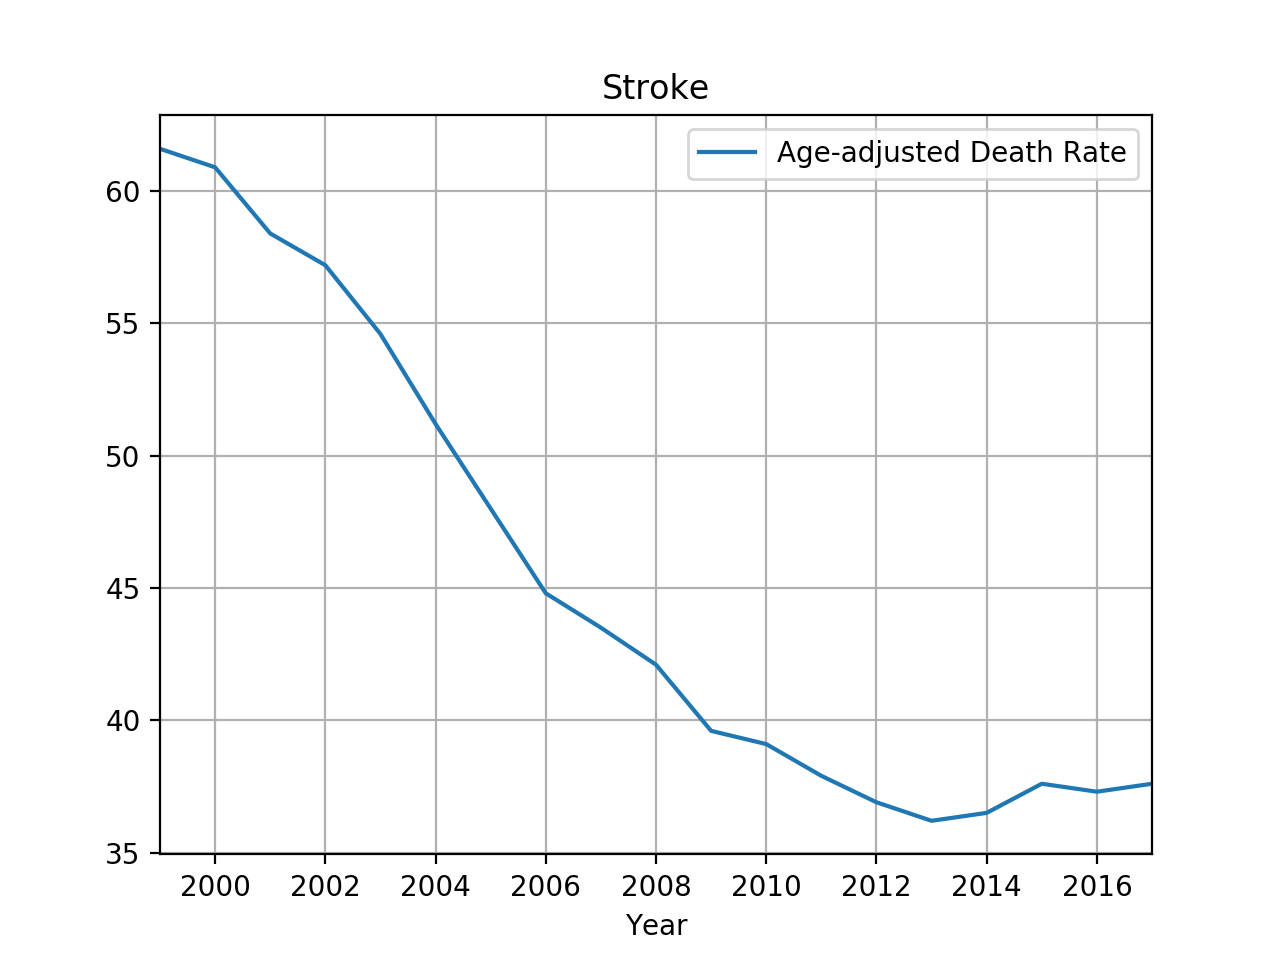

<IPython.core.display.Javascript object>


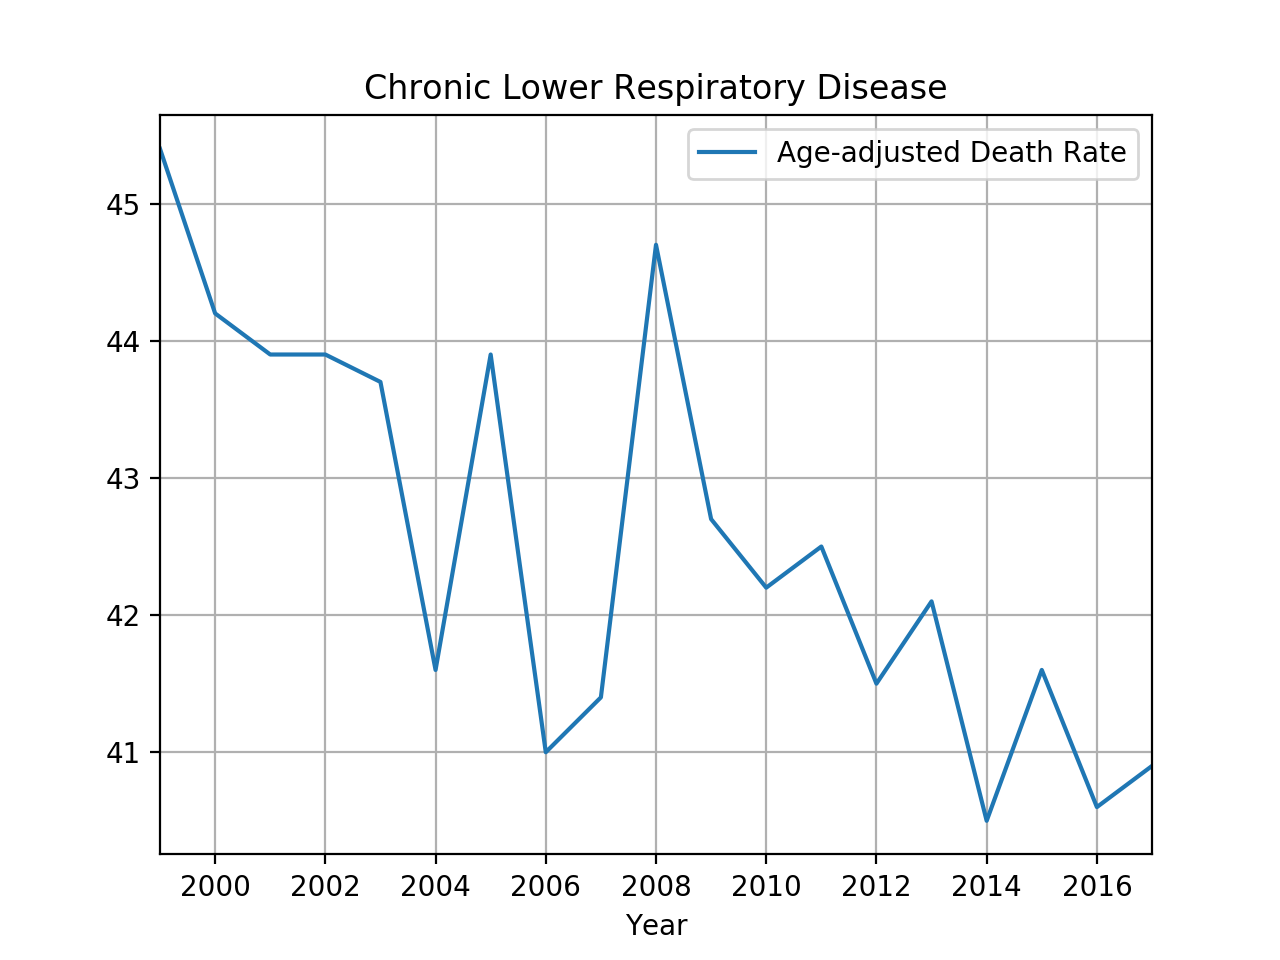

<IPython.core.display.Javascript object>


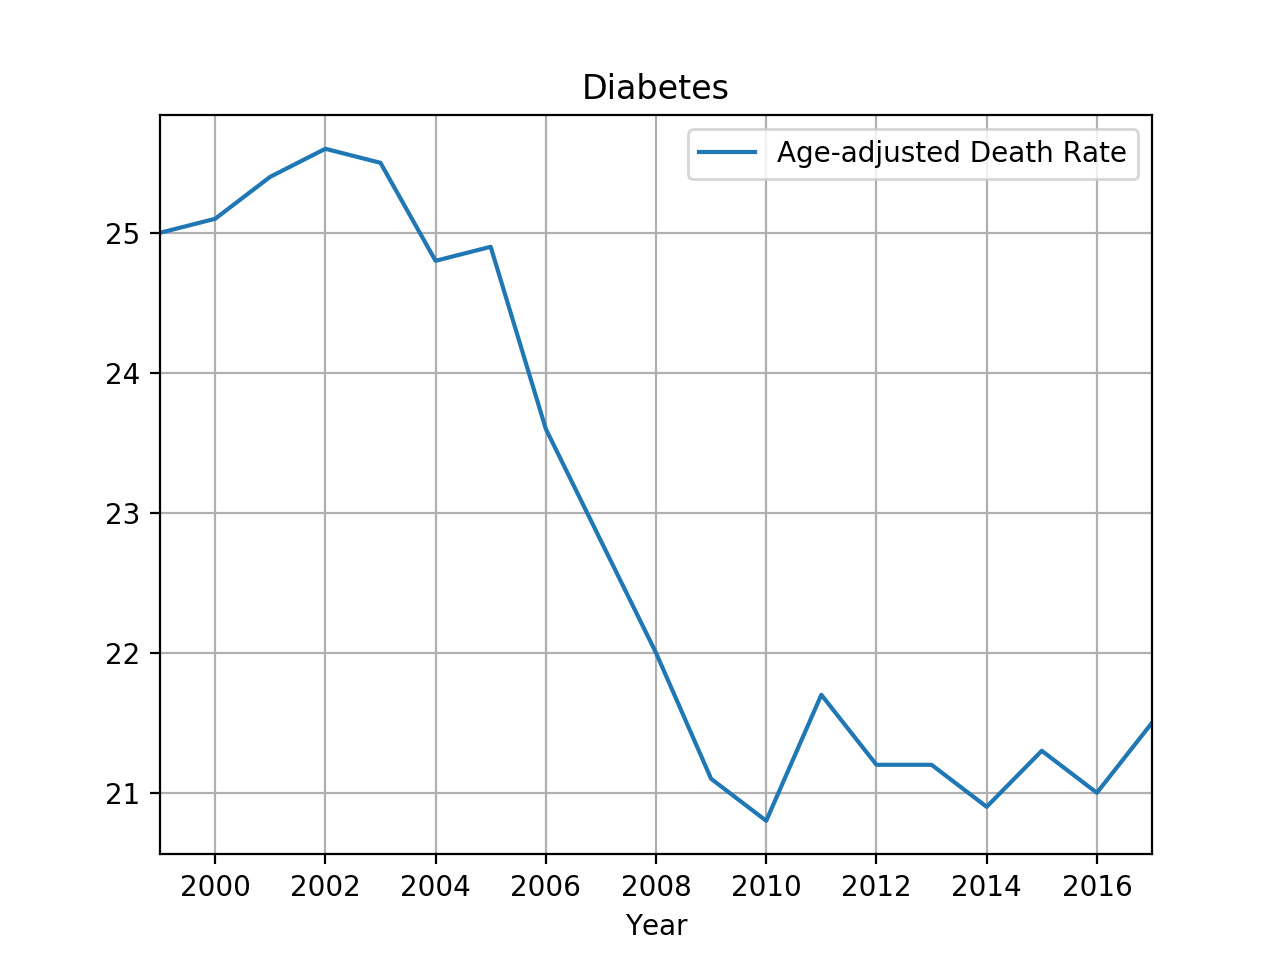

<IPython.core.display.Javascript object>


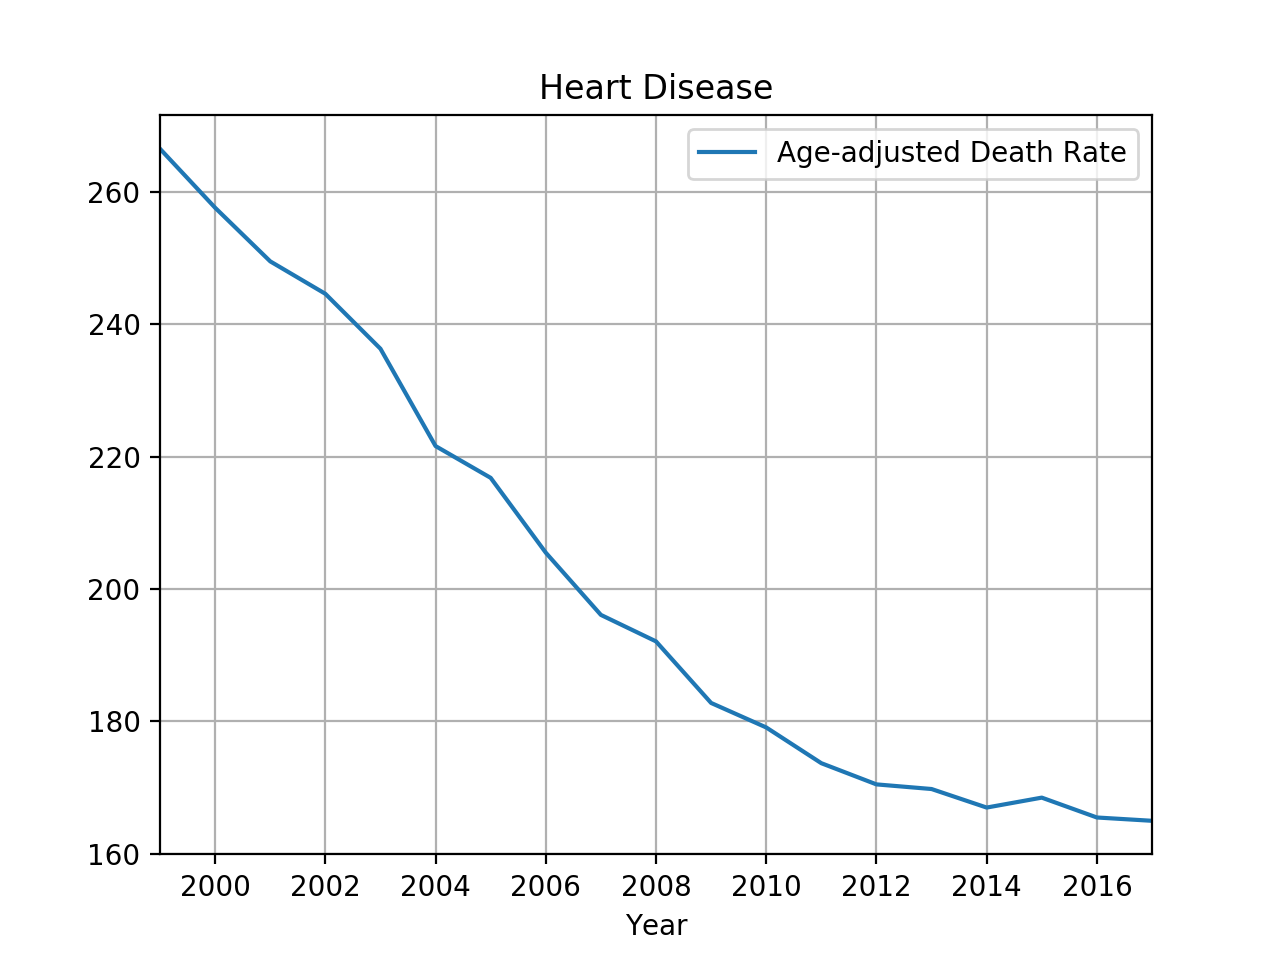

<IPython.core.display.Javascript object>


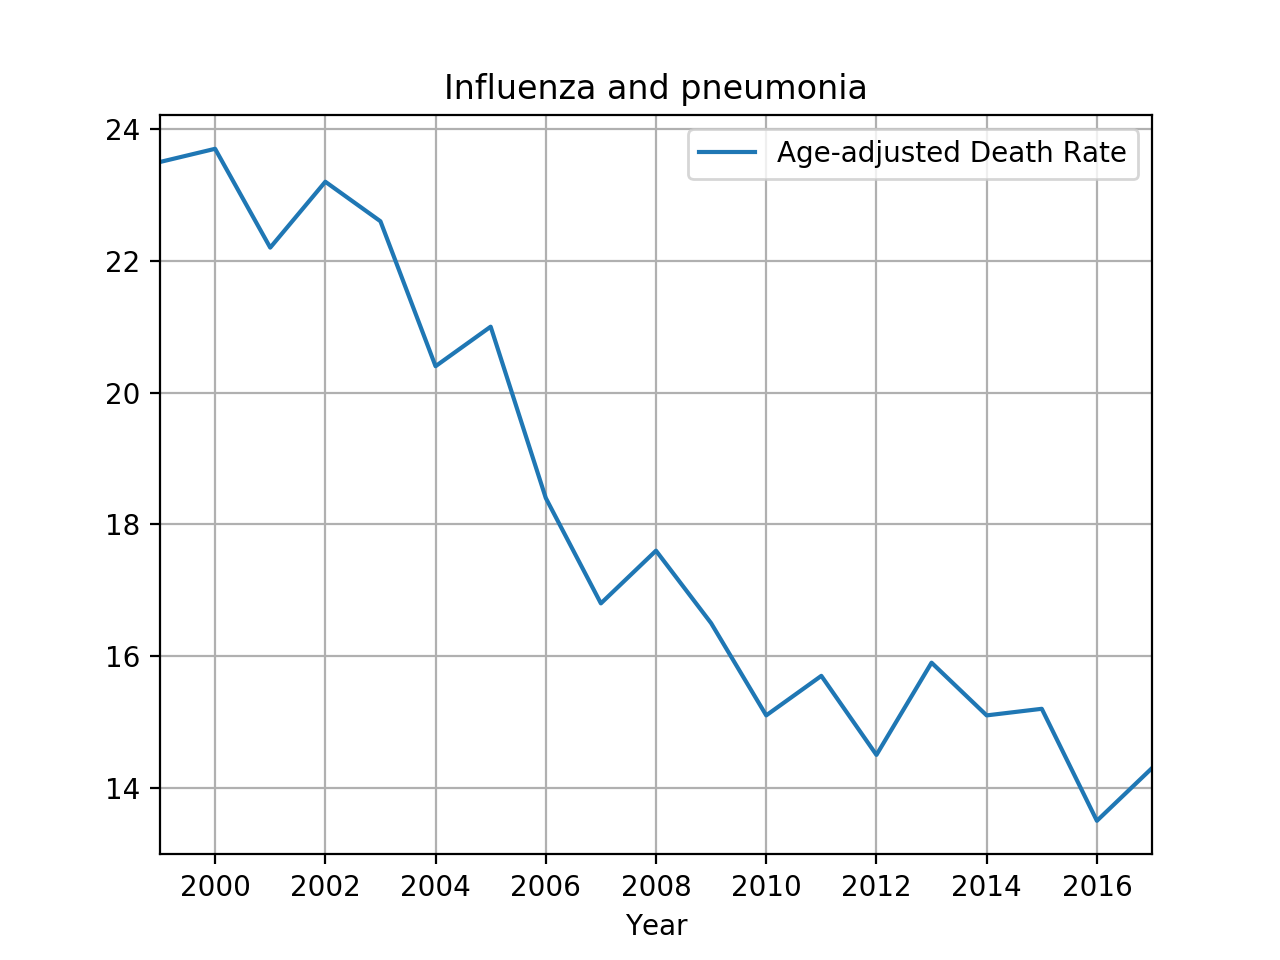

<IPython.core.display.Javascript object>


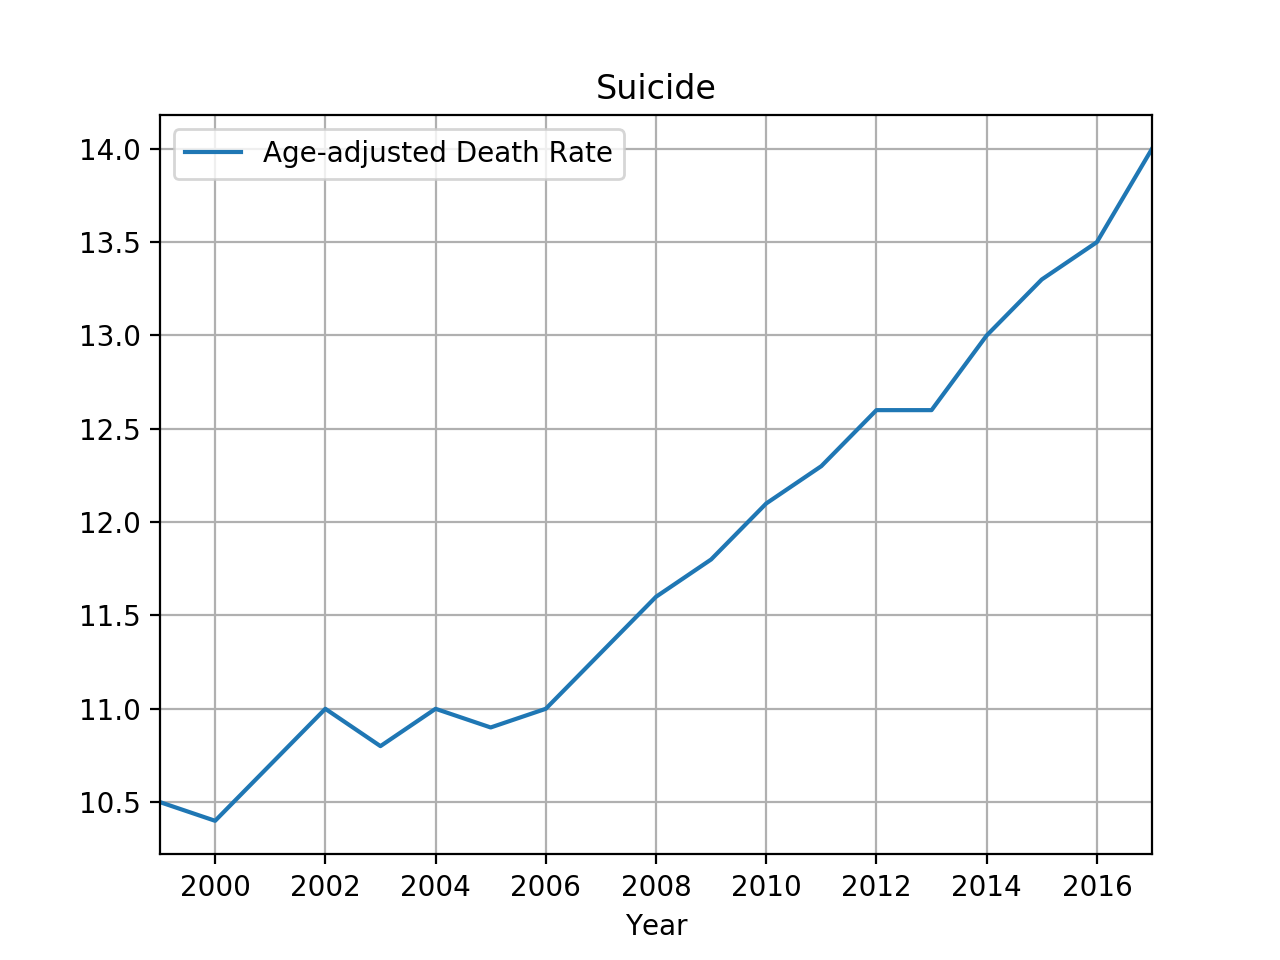

<IPython.core.display.Javascript object>


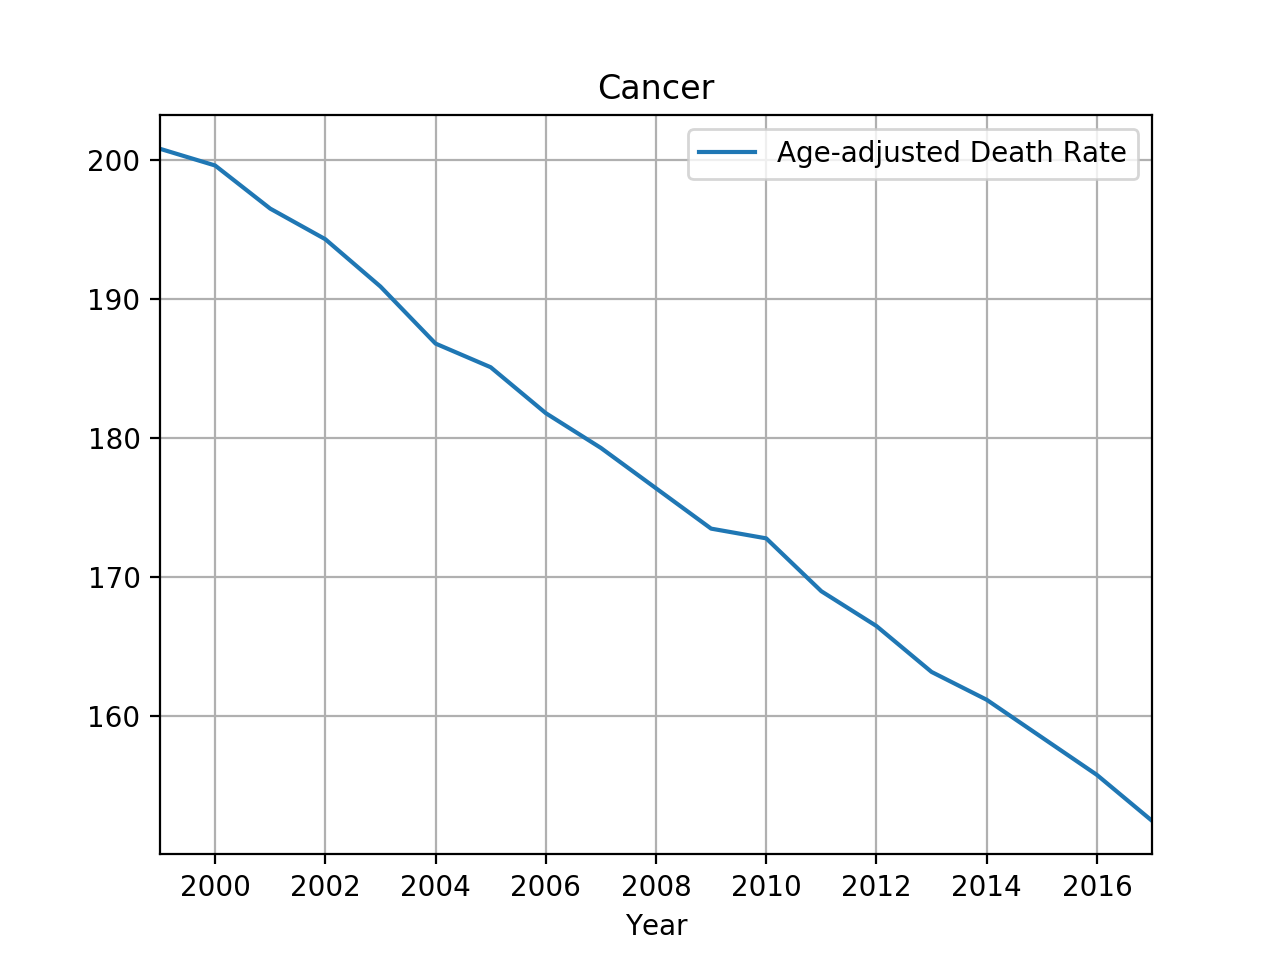

<IPython.core.display.Javascript object>


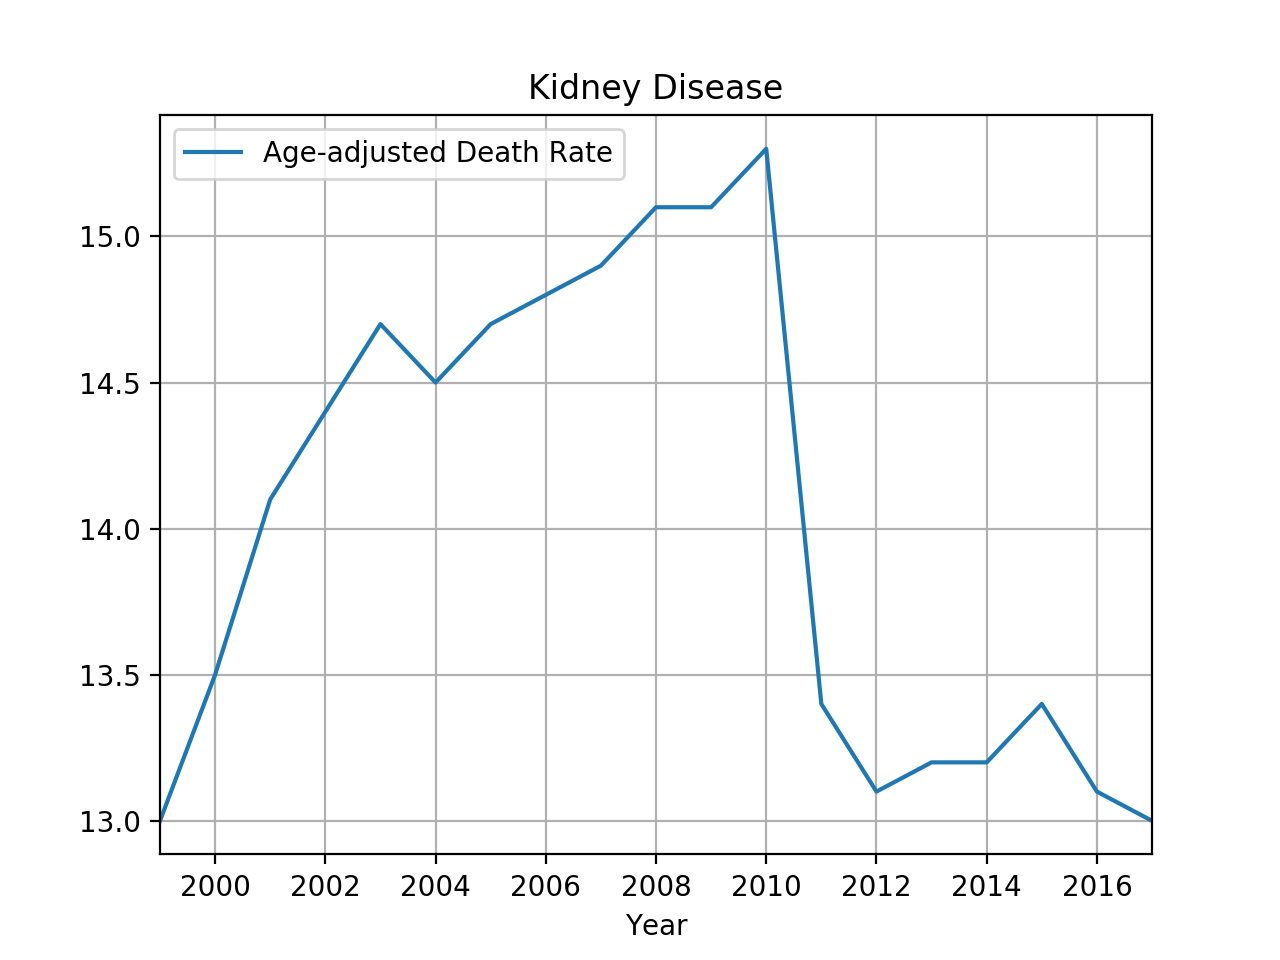

In [62]:
# Individual plots for each disease

injuries_plot = unintentional_injuries.plot(x='Year', y='Age-adjusted Death Rate', grid=True, title="Unintentional Injuries")

alz_plot = alz.plot(x='Year', y='Age-adjusted Death Rate', grid=True, title="Alzheimer's disease")

stroke_plot = stroke.plot(x='Year', y='Age-adjusted Death Rate', grid=True, title="Stroke")

clrd_plot = clrd.plot(x='Year', y='Age-adjusted Death Rate', grid=True, title="Chronic Lower Respiratory Disease")

diabetes_plot = diabetes.plot(x='Year', y='Age-adjusted Death Rate', grid=True, title="Diabetes")

heart_disease_plot = heart_disease.plot(x='Year', y='Age-adjusted Death Rate', grid=True, title="Heart Disease")

flu_plot = flu.plot(x='Year', y='Age-adjusted Death Rate', grid=True, title="Influenza and pneumonia")

suicide_plot = suicide.plot(x='Year', y='Age-adjusted Death Rate', grid=True, title="Suicide")

cancer_plot = cancer.plot(x='Year', y='Age-adjusted Death Rate', grid=True, title="Cancer")

kidney_plot = kidney.plot(x='Year', y='Age-adjusted Death Rate', grid=True, title="Kidney Disease")

<IPython.core.display.Javascript object>


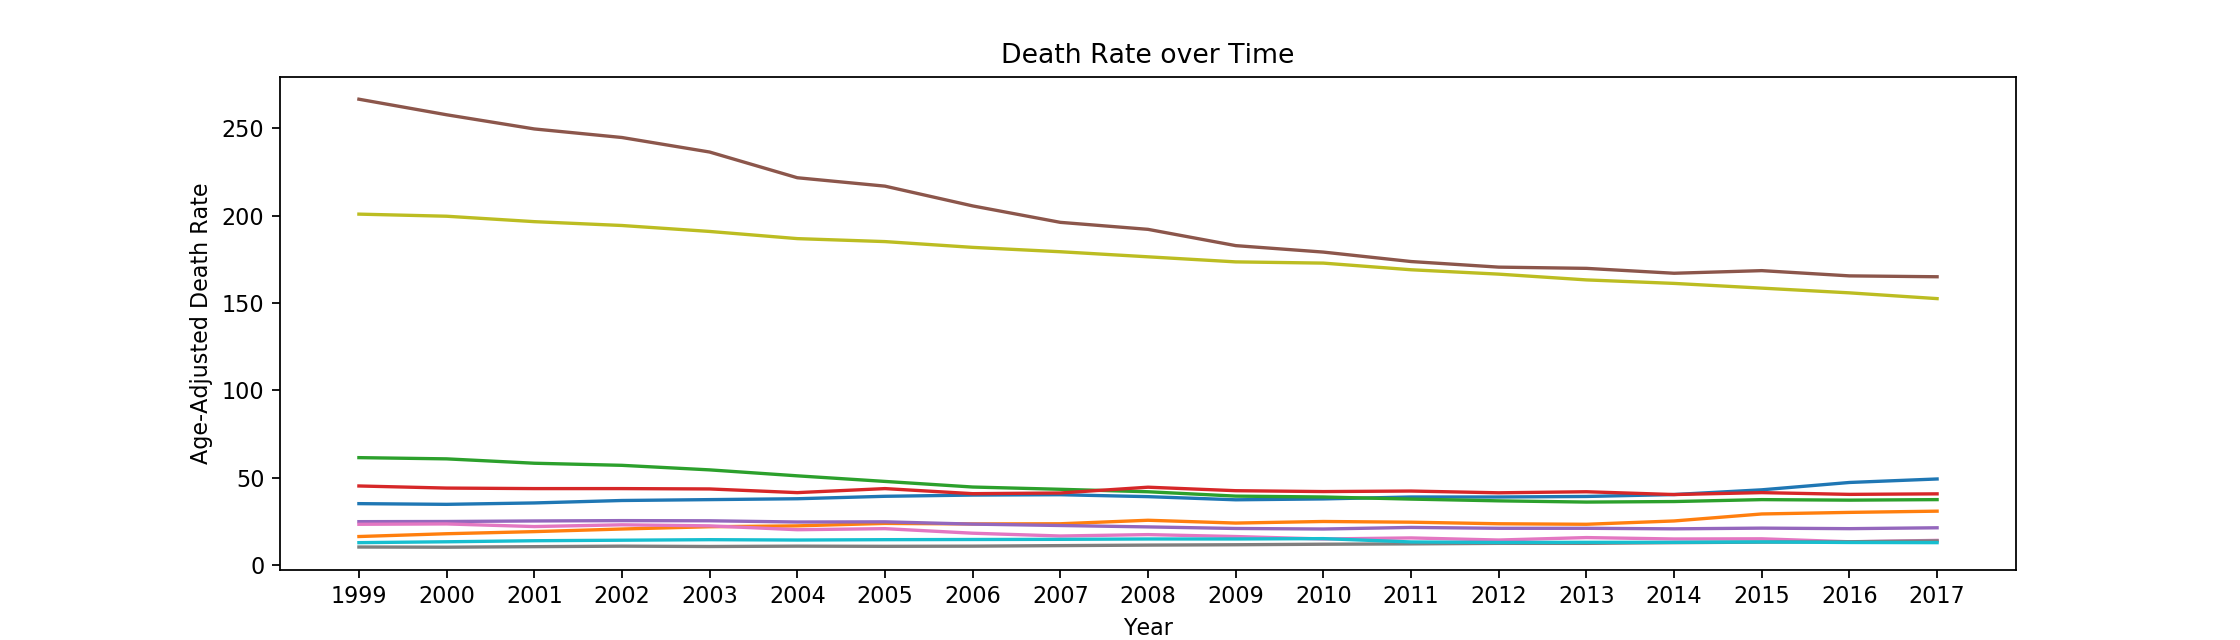

In [64]:
# Every disease in one line graph

fig=plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.xlabel("Year")
plt.ylabel("Age-Adjusted Death Rate")
plt.title("Death Rate over Time")
plt.plot(unintentional_injuries['Year'],unintentional_injuries['Age-adjusted Death Rate'])
plt.plot(alz['Year'],alz['Age-adjusted Death Rate'])
plt.plot(stroke['Year'],stroke['Age-adjusted Death Rate'])
plt.plot(clrd['Year'],clrd['Age-adjusted Death Rate'])
plt.plot(diabetes['Year'],diabetes['Age-adjusted Death Rate'])
plt.plot(heart_disease['Year'],heart_disease['Age-adjusted Death Rate'])
plt.plot(flu['Year'],flu['Age-adjusted Death Rate'])
plt.plot(suicide['Year'],suicide['Age-adjusted Death Rate'])
plt.plot(cancer['Year'],cancer['Age-adjusted Death Rate'])
plt.plot(kidney['Year'],kidney['Age-adjusted Death Rate'])
plt.xticks(unintentional_injuries['Year'])

plt.show()

<IPython.core.display.Javascript object>


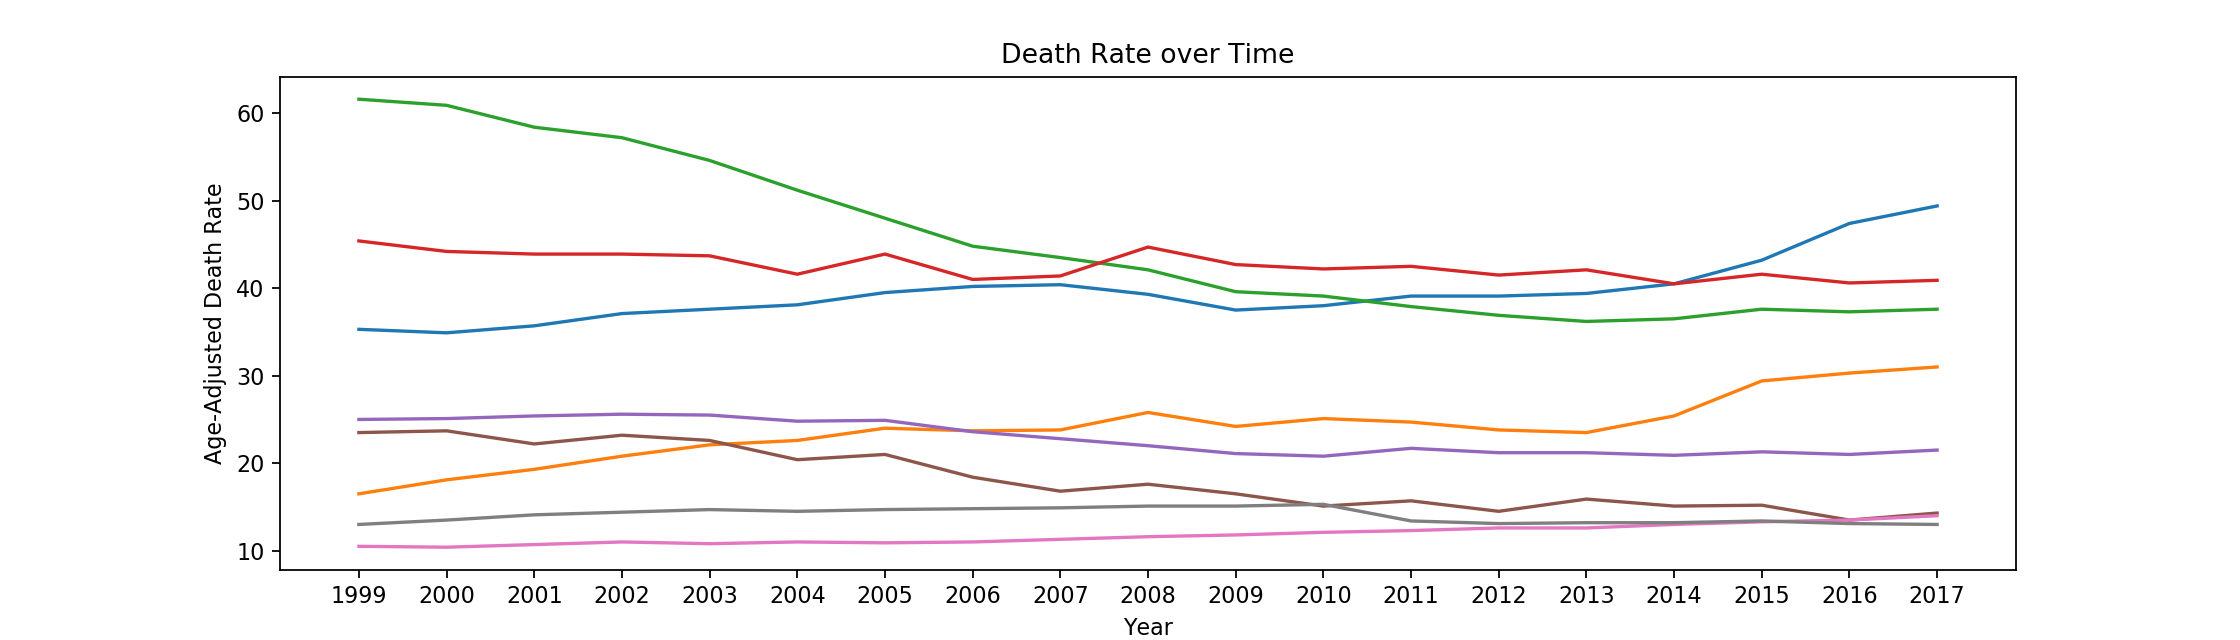

In [70]:
# commenting out cancer and heart disease

fig=plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.xlabel("Year")
plt.ylabel("Age-Adjusted Death Rate")
plt.title("Death Rate over Time")
plt.plot(unintentional_injuries['Year'],unintentional_injuries['Age-adjusted Death Rate'])
plt.plot(alz['Year'],alz['Age-adjusted Death Rate'])
plt.plot(stroke['Year'],stroke['Age-adjusted Death Rate'])
plt.plot(clrd['Year'],clrd['Age-adjusted Death Rate'])
plt.plot(diabetes['Year'],diabetes['Age-adjusted Death Rate'])
#plt.plot(heart_disease['Year'],heart_disease['Age-adjusted Death Rate'])
plt.plot(flu['Year'],flu['Age-adjusted Death Rate'])
plt.plot(suicide['Year'],suicide['Age-adjusted Death Rate'])
#plt.plot(cancer['Year'],cancer['Age-adjusted Death Rate'])
plt.plot(kidney['Year'],kidney['Age-adjusted Death Rate'])
plt.xticks(unintentional_injuries['Year'])

plt.show()